## Case Study

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

### Objective:
The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.
* Determine the optimal value of lambda for ridge and lasso regression.

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 1000)

In [3]:
# read the data
house = pd.read_csv('train.csv')

### Data understanding

In [4]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
house.shape

(1460, 81)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#### Check for duplicate rows in entire dataset based on Id column:

In [8]:
print(house.duplicated(subset=None, keep='first').count())
duplicate_rows=house[house.duplicated(['Id'])]
duplicate_rows
#Below output shows no duplicate rows

1460


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

#### Check for null

In [9]:
missing_values = house.isnull().sum()
missing_values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
total_missing = pd.DataFrame({'column_name': house.columns,'missing_values': missing_values})
missing_columns = total_missing[(total_missing['missing_values'] == 1460)].column_name
(total_missing['missing_values'] == 1460).sum()
# Below output shows that no column has all null values.

0

In [11]:
#checking which columns have more number of null values
missing_row =house.isnull().sum(axis=0).sort_values(ascending=False)
missing_row

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [12]:
#Checking poolQC variable
house.PoolQC.value_counts()
# as per the data dictionary NA in Pool quality indicates NA	No Pool

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [13]:
# replacing NA with No pool
house['PoolQC'].fillna('No Pool', inplace=True) 

In [14]:
# Similarly we impute for the other variables as well as per Data dictionary
house['Alley'].fillna('No alley', inplace=True) 
house['BsmtQual'].fillna('No Basement', inplace=True) 
house['BsmtCond'].fillna('No Basement', inplace=True) 
house['BsmtExposure'].fillna('No Basement', inplace=True) 
house['BsmtFinType1'].fillna('No Basement', inplace=True) 
house['BsmtFinType2'].fillna('No Basement', inplace=True) 
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['GarageType'].fillna('No Garage', inplace=True)
house['GarageFinish'].fillna('No Garage', inplace=True)
house['GarageQual'].fillna('No Garage', inplace=True)
house['GarageCond'].fillna('No Garage', inplace=True)
house['Fence'].fillna('No Fence', inplace=True)
house['MiscFeature'].fillna('None', inplace=True)

In [15]:
missing_row =house.isnull().sum(axis=0).sort_values(ascending=False)
missing_row

LotFrontage      259
GarageYrBlt       81
MasVnrType         8
MasVnrArea         8
Electrical         1
KitchenQual        0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
Id                 0
GarageFinish       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
KitchenAbvGr       0
GarageCars         0
GarageArea         0
PoolQC             0
SaleCondition      0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
MiscFeature        0
Fence              0
PoolArea           0
GarageQual         0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
1stFlrSF           0
HeatingQC          0
CentralAir         0
LandSlope          0
OverallCond        0
OverallQual        0
HouseStyle   

In [16]:
house.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [17]:
#imputing NA with median/mode for the following
house['LotFrontage'] =house['LotFrontage'].fillna(house['LotFrontage'].median())     
house['MasVnrType'] =house['MasVnrType'].fillna(house['MasVnrType'].mode()[0]) 
house['MasVnrArea'] =house['MasVnrArea'].fillna(house['MasVnrArea'].median())
house['GarageYrBlt'] =house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())
house['Electrical'] =house['Electrical'].fillna(house['Electrical'].mode()[0]) 

In [18]:
missing_row =house.isnull().sum(axis=0).sort_values(ascending=False)
missing_row

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

In [19]:
house.shape

(1460, 81)

In [20]:
#checking for Null values
house.isnull().values.any()

False

#### Outlier treatment

In [21]:
house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
std       1.112799    30.202904     20.645407   180.731373   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.280000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
95%       0.000000      0.000000    11.000000  2010.000000  326100.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 38 columns]

* Many numeric features have outliers
* Removing all the outliers will cause loss of information.
* Hence assigning minimum and maximum values to the outliers.
* We are considering the IQR here to be the difference between 1% and 99% .
* Excluding target 'SalePrice' from this imputation.

In [22]:
#excluding SalePrice
outlier = house[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']]
outlier.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [23]:
for i in outlier:
    IQR = house[i].quantile([0.01,0.99]).values
    
    house[i][house[i] <= IQR[0]] = IQR[0]
    house[i][house[i] >= IQR[1]] = IQR[1]

In [24]:
house.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.00000  1460.000000  1460.000000   1460.000000  1460.000000   
mean    730.50000    56.897260    69.459692  10063.006575     6.104110   
std     421.34343    42.300571    19.581352   5062.299090     1.369444   
min      15.59000    20.000000    21.000000   1680.000000     3.000000   
25%     365.75000    20.000000    60.000000   7553.500000     5.000000   
50%     730.50000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.25000    70.000000    79.000000  11601.500000     7.000000   
90%    1314.10000   120.000000    92.000000  14381.700000     8.000000   
95%    1387.05000   160.000000   104.000000  17401.150000     8.000000   
99%    1445.16810   190.000000   137.168100  36937.732400    10.000000   
max    1445.41000   190.000000   137.410000  37567.640000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.580137  1971.413493   1984.861644   100.613836   438.530240  ...   
std       1.098826    29.806332     20.640499   167.724777   429.049203  ...   
min       3.000000  1899.180000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   164.250000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   789.344800  1572.168100  ...   
max       9.000000  2009.000000   2009.000000   791.280000  1572.410000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     93.155411    45.825548      21.434760     2.520548    14.326541   
std     120.812804    61.985174      58.382129    19.932690    51.369279   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     504.008600   285.336200     259.840500   168.000000   266.840500   
max     505.460000   285.820000     261.050000   168.000000   268.050000   

       PoolArea      MiscVal       MoSold       YrSold      SalePrice  
count    1460.0  1460.000000  1460.000000  1460.000000    1460.000000  
mean        0.0    19.482192     6.321918  2007.815753  180921.195890  
std         0.0   104.884363     2.703626     1.328095   79442.502883  
min         0.0     0.000000     1.000000  2006.000000   34900.000000  
25%         0.0     0.000000     5.000000  2007.000000  129975.000000  
50%         0.0     0.000000     6.000000  2008.000000  163000.000000  
75%         0.0     0.000000     8.000000  2009.000000  214000.000000  
90%         0.0     0.000000    10.000000  2010.000000  278000.000000  
95%         0.0     0.000000    11.000000  2010.000000  326100.000000  
99%         0.0   700.000000    12.000000  2010.000000  442567.010000  
max         0.0   700.000000    12.000000  2010.000000  755000.000000  

[11 rows x 38 columns]

In [25]:
house.shape

(1460, 81)

In [26]:
# Converting all year features into number of years
for i in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    house[i] = 2022 -house[i]

##### Let us separate numerical and categorical features

In [27]:
numeric = house.select_dtypes(include=['int64', 'float64'])
categorical = house.select_dtypes(include=['object'])

In [28]:
numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### EDA

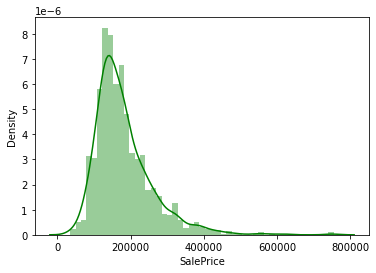

In [30]:
#lets visualize how our target variable is
plt.figure()
sns.distplot(house['SalePrice'],color='g')
plt.show()

In [31]:
#its skewed towards the left hence performing log transform on it
house['SalePrice']=np.log1p(house['SalePrice'])

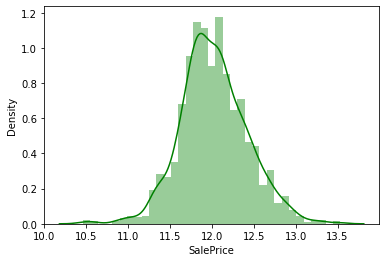

In [32]:
plt.figure()
sns.distplot(house['SalePrice'],color='g')
plt.show()

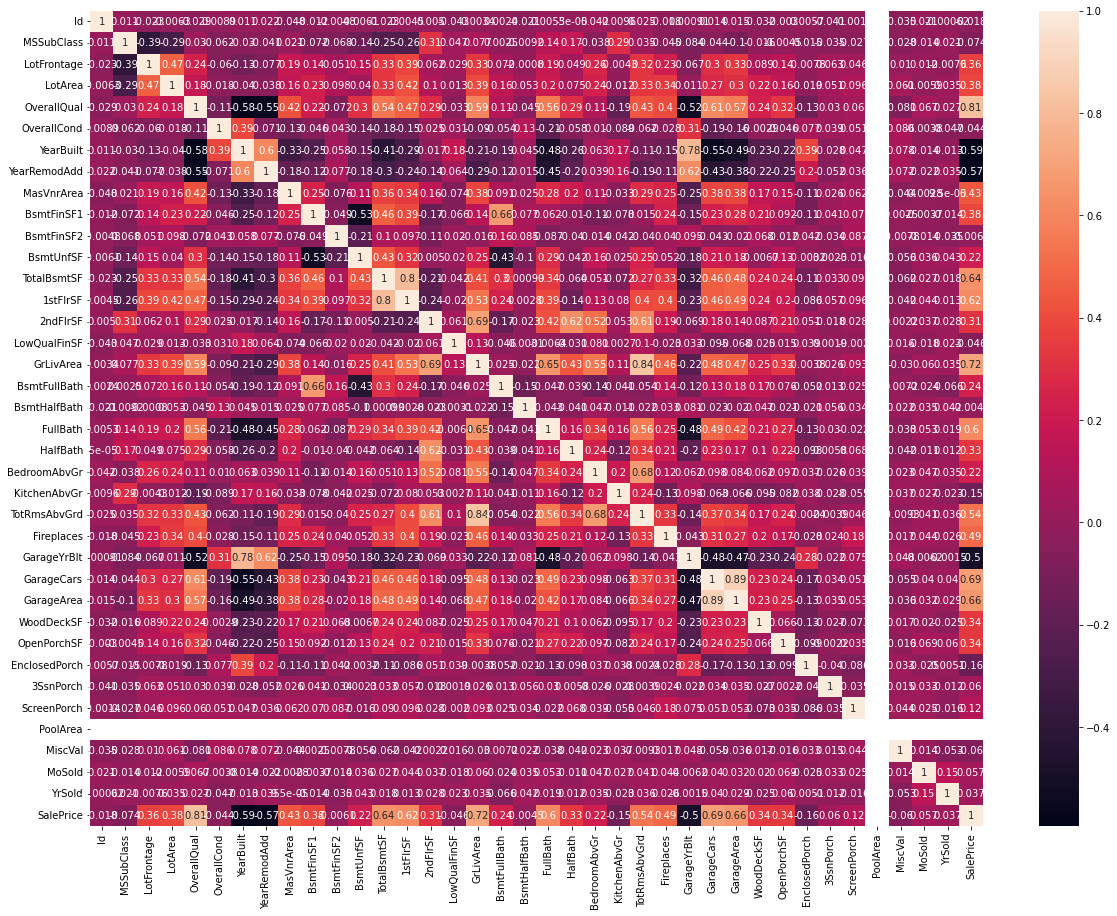

In [33]:
# Numerical Variable visualization:
#correlation plots:
plt.figure(figsize=(20,15))
sns.heatmap(house.corr(),annot=True)
plt.show()

In [34]:
house.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011176    -0.023467 -0.006339    -0.029298   
MSSubClass     0.011176    1.000000    -0.394884 -0.287184     0.030368   
LotFrontage   -0.023467   -0.394884     1.000000  0.470410     0.235663   
LotArea       -0.006339   -0.287184     0.470410  1.000000     0.184171   
OverallQual   -0.029298    0.030368     0.235663  0.184171     1.000000   
OverallCond    0.008899   -0.062109    -0.059942 -0.018027    -0.108943   
YearBuilt      0.011157   -0.030109    -0.126141 -0.040490    -0.582135   
YearRemodAdd   0.022063   -0.040655    -0.076753 -0.037817    -0.550096   
MasVnrArea    -0.047866    0.021408     0.185860  0.160771     0.420442   
BsmtFinSF1    -0.012354   -0.072091     0.142793  0.232365     0.224470   
BsmtFinSF2    -0.004836   -0.068250     0.051499  0.098398    -0.072112   
BsmtUnfSF     -0.006134   -0.140218     0.145597  0.040419     0.304053   
TotalBsmtSF   -0.022702   -0.252805     0.331228  0.331201     0.541839   
1stFlrSF       0.004498   -0.261070     0.387490  0.416632     0.473572   
2ndFlrSF       0.004967    0.311190     0.062079  0.104770     0.290357   
LowQualFinSF  -0.042969    0.047247     0.029299  0.013372    -0.032969   
GrLivArea      0.003367    0.077453     0.334882  0.393643     0.593196   
BsmtFullBath   0.002362    0.002470     0.071741  0.157065     0.113887   
BsmtHalfBath  -0.021460   -0.009186    -0.000803  0.053225    -0.044628   
FullBath       0.005316    0.136604     0.187475  0.198020     0.555624   
HalfBath      -0.000050    0.173917     0.048579  0.075049     0.293612   
BedroomAbvGr   0.041888   -0.037731     0.262124  0.238973     0.105276   
KitchenAbvGr   0.009583    0.287409    -0.004314 -0.012481    -0.188835   
TotRmsAbvGrd   0.024882    0.035000     0.324790  0.328835     0.429783   
Fireplaces    -0.018394   -0.045160     0.228228  0.343657     0.397798   
GarageYrBlt    0.000910   -0.084229    -0.067388  0.010827    -0.520469   
GarageCars     0.013882   -0.044390     0.295392  0.268968     0.608540   
GarageArea     0.014943   -0.101898     0.328588  0.301413     0.566711   
WoodDeckSF    -0.031724   -0.016440     0.088622  0.222785     0.242538   
OpenPorchSF   -0.002958   -0.004478     0.137040  0.160257     0.324401   
EnclosedPorch  0.005680   -0.014892    -0.007793 -0.018566    -0.127305   
3SsnPorch     -0.040929   -0.034923     0.062567  0.051020     0.029500   
ScreenPorch   -0.001365   -0.027292     0.046262  0.095568     0.060444   
PoolArea            NaN         NaN          NaN       NaN          NaN   
MiscVal       -0.034645   -0.027886     0.010059  0.060646    -0.081100   
MoSold         0.021203   -0.013585     0.011555 -0.005922     0.067026   
YrSold        -0.000616    0.021407    -0.007592  0.035254     0.027131   
SalePrice     -0.017890   -0.073959     0.362566  0.384818     0.814625   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.008899   0.011157      0.022063   -0.047866   -0.012354   
MSSubClass       -0.062109  -0.030109     -0.040655    0.021408   -0.072091   
LotFrontage      -0.059942  -0.126141     -0.076753    0.185860    0.142793   
LotArea          -0.018027  -0.040490     -0.037817    0.160771    0.232365   
OverallQual      -0.108943  -0.582135     -0.550096    0.420442    0.224470   
OverallCond       1.000000   0.386027     -0.070660   -0.133273   -0.045502   
YearBuilt         0.386027   1.000000      0.601027   -0.326062   -0.251577   
YearRemodAdd     -0.070660   0.601027      1.000000   -0.183269   -0.124823   
MasVnrArea       -0.133273  -0.326062     -0.183269    1.000000    0.245066   
BsmtFinSF1       -0.045502  -0.251577     -0.124823    0.245066    1.000000   
BsmtFinSF2        0.043483   0.058224      0.076711   -0.076070   -0.048805   
BsmtUnfSF        -0.136889  -0.151271     -0.179555    0.112785   -0.526524   
TotalBsmtSF      -0.180315  -0.410710     -0.300387    0.359840    0

Corelation of price with independent variables:
* Price is highly positively corelated with overall quality, total bsmt area (sq feet), first floor area (sq feet), ground living area, garage size and area.
* Price is also negatively corelated to some features such as year of the house built, YearRemodAdd, Garage year built, etc.

* There is high correlation between some features, hence we will remove few of them as they wont add more information.
1. GarageCars and GarageArea ->Dropping GarageCars
2. GarageYrBlt and YearBuilt ->GarageYrBlt has it had missing values as well
3. TotRmsAbvGrd and GrLivArea
4. TotalBsmtSF and 1stflrSF ->Dropping TotalBsmtSF

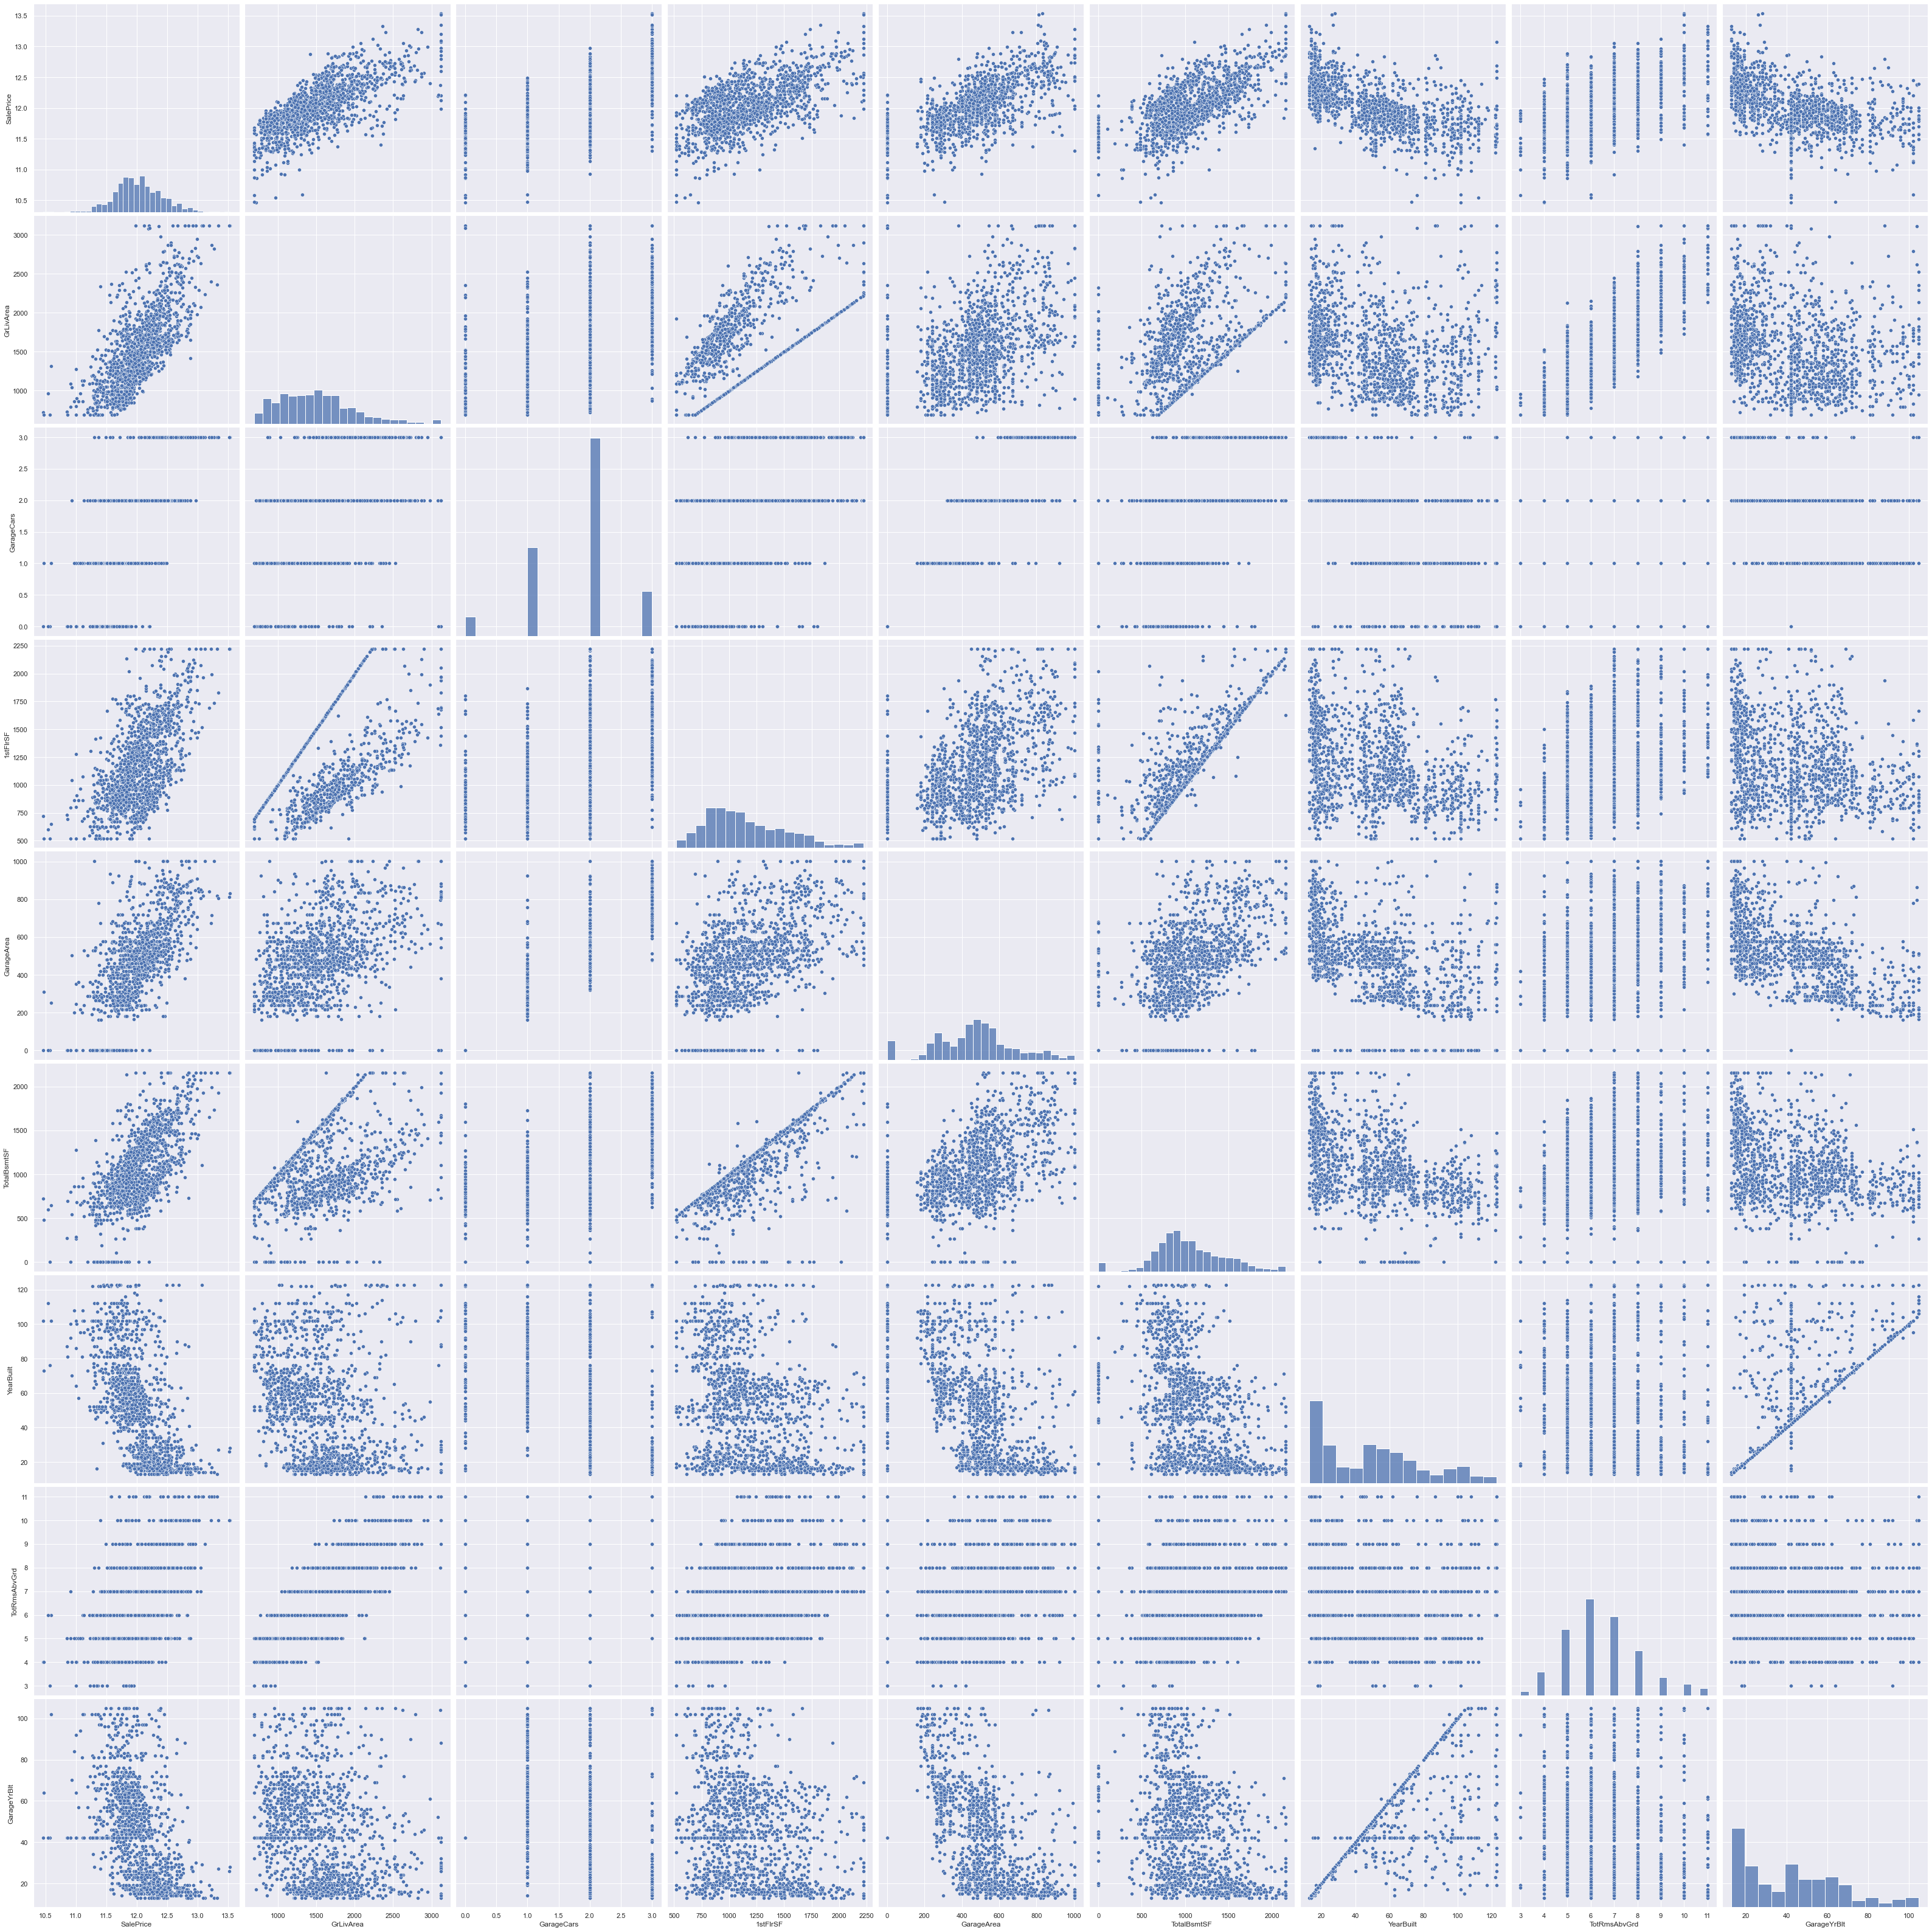

In [35]:
# Let us look at their pair plots against target variable(SalePrice)
sns.set()
x = ['SalePrice', 'GrLivArea', 'GarageCars', '1stFlrSF' , 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house[x], size = 5)
plt.show()

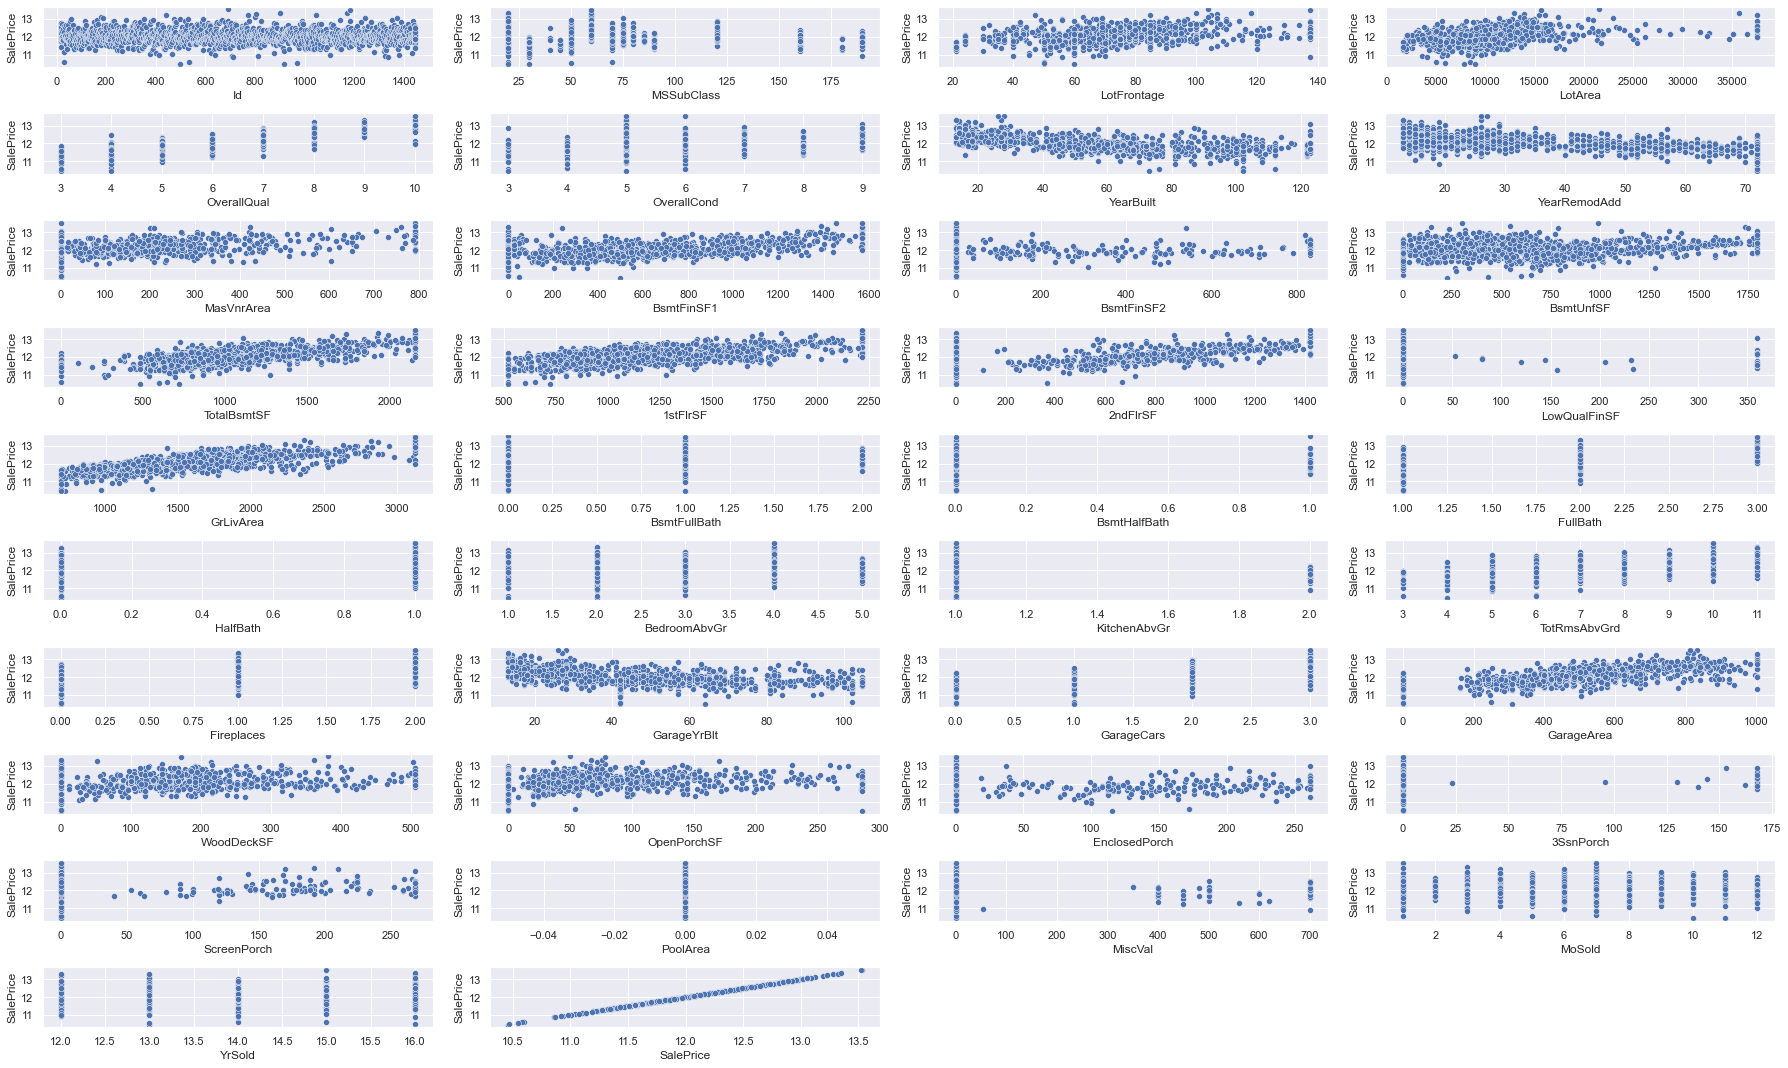

In [36]:
#visualizing numeric features
plt.figure(figsize=(25, 15))
for i, feature in enumerate(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold', 'SalePrice']):
    plt.subplot(10, 4, i+1)
    sns.scatterplot(house[feature], house['SalePrice'])
    plt.tight_layout()

#### Observations:
* LotFrontage, LotArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea are all showing positive correlation with SalePrice.
* Some features have discrete values: LowQualFinSF, BsmtHalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, GarageCars, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, GarageYrBlt and MasVnrArea.
* Removing features that have single discrete values as they wont add much impact.
* Removing ID as it doesnt add value to the prediction.
* More the overall quality rating, more the SalePrice.
* There is linear relation between OverallCond and SalePrice.
* FullBath = 3 and HalfBath = 1 have more SalePrice.
* TotRmsAbvGrd-Increasing trend seen.

In [37]:
house.drop(['Id', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt', 'TotalBsmtSF', 'MasVnrArea'], axis=1, inplace=True)
house.shape

(1460, 64)

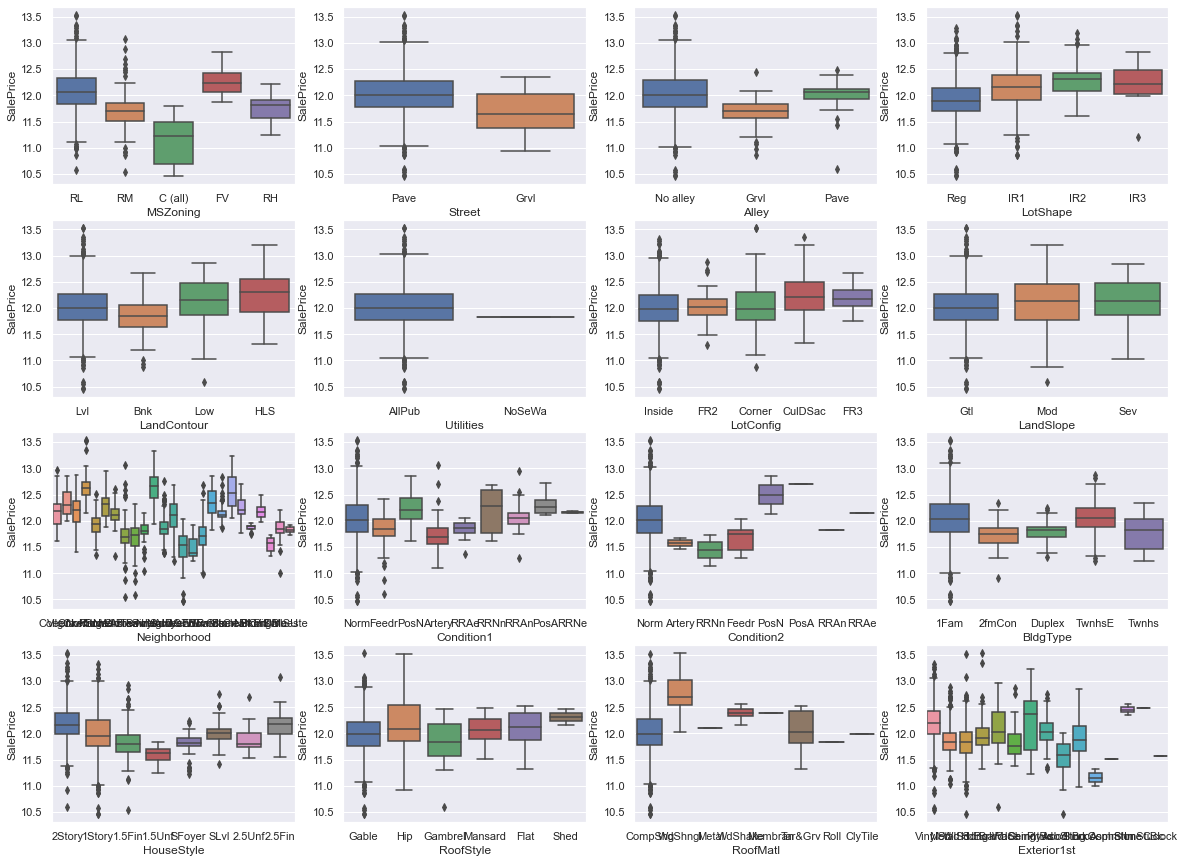

In [38]:
# Visualiing categorical variables: 
plt.figure(figsize=(20, 15))
plt.subplot(4,4,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house)
plt.subplot(4,4,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house)
plt.subplot(4,4,3)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = house)
plt.subplot(4,4,4)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = house)
plt.subplot(4,4,5)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = house)
plt.subplot(4,4,6)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = house)
plt.subplot(4,4,7)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = house)
plt.subplot(4,4,8)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = house)
plt.subplot(4,4,9)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house)
plt.subplot(4,4,10)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = house)
plt.subplot(4,4,11)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = house)
plt.subplot(4,4,12)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house)
plt.subplot(4,4,13)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = house)
plt.subplot(4,4,14)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = house)
plt.subplot(4,4,15)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = house)
plt.subplot(4,4,16)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = house)
plt.show()

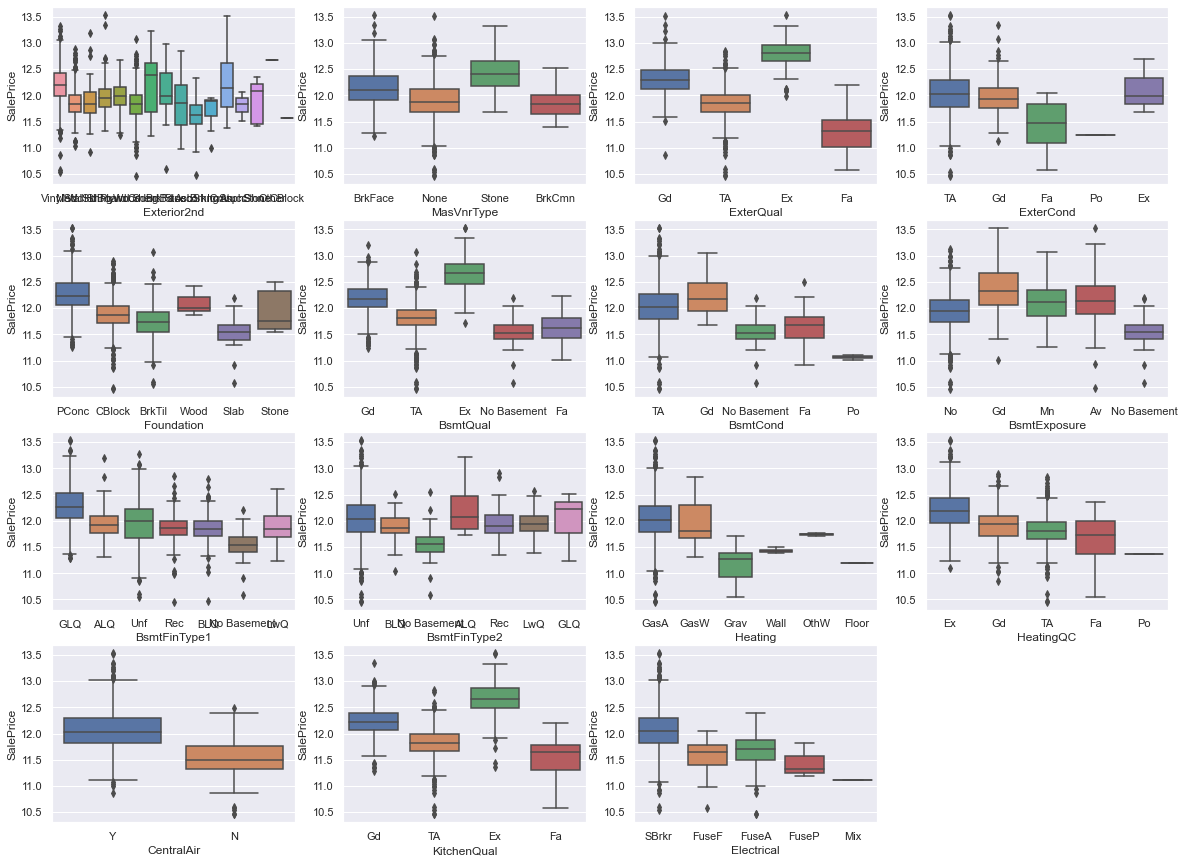

In [39]:
plt.figure(figsize=(20, 15))
plt.subplot(4,4,1)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = house)
plt.subplot(4,4,2)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = house)
plt.subplot(4,4,3)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house)
plt.subplot(4,4,4)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = house)
plt.subplot(4,4,5)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = house)
plt.subplot(4,4,6)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house)
plt.subplot(4,4,7)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = house)
plt.subplot(4,4,8)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house)
plt.subplot(4,4,9)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = house)
plt.subplot(4,4,10)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = house)
plt.subplot(4,4,11)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house)
plt.subplot(4,4,12)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house)
plt.subplot(4,4,13)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = house)
plt.subplot(4,4,14)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house)
plt.subplot(4,4,15)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house)
plt.show()

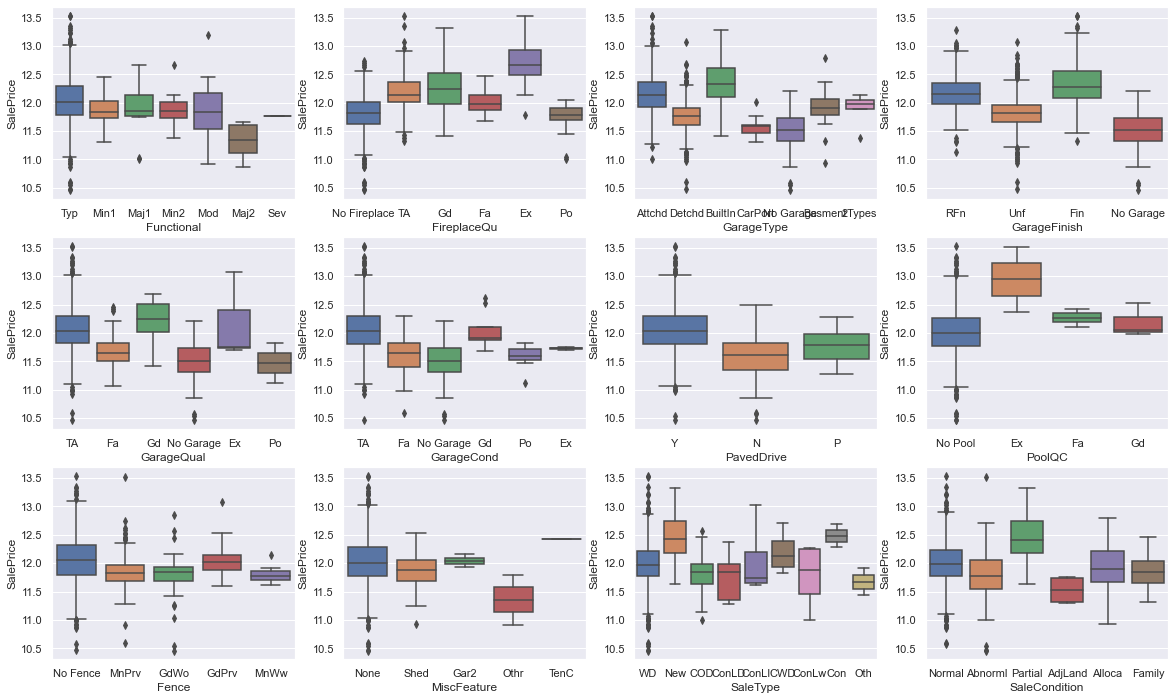

In [40]:
plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = house)
plt.subplot(3,4,2)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = house)
plt.subplot(3,4,3)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house)
plt.subplot(3,4,4)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house)
plt.subplot(3,4,5)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house)
plt.subplot(3,4,6)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = house)
plt.subplot(3,4,7)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = house)
plt.subplot(3,4,8)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = house)
plt.subplot(3,4,9)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = house)
plt.subplot(3,4,10)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = house)
plt.subplot(3,4,11)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house)
plt.subplot(3,4,12)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house)
plt.show()

#### Observation:
* Houses under Residentially Low density have high Sale Price.
* Paved Roads have more Sale price compared to Gravel Roads.
* Most of the houses don't have alley.
* Irregular shape of property have slightly higher Sale price.
* Except for 1 house, all other houses have all public utilities, hence we can remove this feature as it doesnt add much information.
* Lot configuration and Slope of property dont show much deviation, all categories are in almost same range.
* Normal Condition Houses have high SalePrice.
* 2 storied houses have the highest SalePrice.
* Houses with Excellent quality and condition on the exterior have the high SalePrice.
* Poured Contrete Foundation houses have high sales.
* Houses with excellent quality basement have the highest SalePrice.
* Heating type = GasA have the high price.
* Houses with Central air conditioning have high Sales.
* Houses with excellent kitchen quality and Standard Circuit Breakers & Romex electricals have Highest sales.
* There is a very small number of houses that are severely damaged.
* SalePrice range is high for houses with Excelent fireplace quality.
* SalePrice is high with builtin finished garages.
* Many houses do not have fence and Pool 

In [41]:
house.drop(['PoolQC', 'Alley','Fence', 'MiscFeature', 'Utilities'], axis=1, inplace=True)
house.shape

(1460, 59)

In [42]:
# Converting the below features to objects
convert = ['MSSubClass','OverallQual','OverallCond']
house[convert] = house[convert].astype('object')

In [43]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   object 
 15  OverallCond    1460 non-null   object 
 16  YearBuilt      1460 non-null   float64
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

### Preparing the data for modelling: 
* Dummy variables
* Scaling

In [44]:
## Dummy variable creation for the categoricals
categorical = house.select_dtypes(include=['object'])

dummy = pd.get_dummies(categorical,drop_first=True )
dummy.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 236 columns]

In [45]:
dummy.shape

(1460, 236)

In [46]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 236 entries, MSSubClass_30 to SaleCondition_Partial
dtypes: uint8(236)
memory usage: 336.6 KB


In [47]:
house.shape

(1460, 59)

In [48]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   object 
 15  OverallCond    1460 non-null   object 
 16  YearBuilt      1460 non-null   float64
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [49]:
final_house = pd.concat([house,dummy],axis=1)
final_house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         60       RL         65.0   8450.0   Pave      Reg         Lvl   
1         20       RL         80.0   9600.0   Pave      Reg         Lvl   
2         60       RL         68.0  11250.0   Pave      IR1         Lvl   
3         70       RL         60.0   9550.0   Pave      IR1         Lvl   
4         60       RL         84.0  14260.0   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... SaleType_ConLI SaleType_ConLw  \
0    Inside       Gtl      CollgCr  ...              0              0   
1       FR2       Gtl      Veenker  ...              0              0   
2    Inside       Gtl      CollgCr  ...              0              0   
3    Corner       Gtl      Crawfor  ...              0              0   
4       FR2       Gtl      NoRidge  ...              0              0   

  SaleType_New SaleType_Oth SaleType_WD SaleCondition_AdjLand  \
0            0            0           1                     0   
1            0            0           1                     0   
2            0            0           1                     0   
3            0            0           1                     0   
4            0            0           1                     0   

   SaleCondition_Alloca  SaleCondition_Family SaleCondition_Normal  \
0                     0                     0                    1   
1                     0                     0                    1   
2                     0                     0                    1   
3                     0                     0                    0   
4                     0                     0                    1   

  SaleCondition_Partial  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 295 columns]

In [50]:
final_house = final_house.drop(list(categorical.columns),axis=1)

In [51]:
final_house.shape

(1460, 254)

In [52]:
pd.set_option('display.max_columns', None)
final_house.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0       19.0            19       706.0         0.0   
1         80.0   9600.0       46.0            46       978.0         0.0   
2         68.0  11250.0       21.0            20       486.0         0.0   
3         60.0   9550.0      107.0            52       216.0         0.0   
4         84.0  14260.0       22.0            22       655.0         0.0   

   BsmtUnfSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0      150.0     856.0     854.0     1710.0             1         2         1   
1      284.0    1262.0       0.0     1262.0             0         2         0   
2      434.0     920.0     866.0     1786.0             1         2         1   
3      540.0     961.0     756.0     1717.0             1         1         0   
4      490.0    1145.0    1053.0     2198.0             1         2         1   

   TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0             8       548.0         0.0         61.0  12.247699   
1             6       460.0       298.0          0.0  12.109016   
2             6       608.0         0.0         42.0  12.317171   
3             7       642.0         0.0         35.0  11.849405   
4             9       836.0       192.0         84.0  12.429220   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4               

In [53]:
final_house.describe()

LotFrontage       LotArea    YearBuilt  YearRemodAdd   BsmtFinSF1  \
count  1460.000000   1460.000000  1460.000000   1460.000000  1460.000000   
mean     69.459692  10063.006575    50.586507     37.138356   438.530240   
std      19.581352   5062.299090    29.806332     20.640499   429.049203   
min      21.000000   1680.000000    13.000000     13.000000     0.000000   
25%      60.000000   7553.500000    22.000000     18.000000     0.000000   
50%      69.000000   9478.500000    49.000000     28.000000   383.500000   
75%      79.000000  11601.500000    68.000000     55.000000   712.250000   
max     137.410000  37567.640000   122.820000     72.000000  1572.410000   

        BsmtFinSF2    BsmtUnfSF     1stFlrSF     2ndFlrSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     44.404589   565.397089  1158.294452   345.021781  1510.289658   
std     148.265347   436.085086   363.802701   430.816964   495.148927   
min       0.000000     0.000000   520.000000     0.000000   692.180000   
25%       0.000000   223.000000   882.000000     0.000000  1129.500000   
50%       0.000000   477.500000  1087.000000     0.000000  1464.000000   
75%       0.000000   808.000000  1391.250000   728.000000  1776.750000   
max     830.380000  1797.050000  2219.460000  1418.920000  3123.480000   

       BsmtFullBath     FullBath     HalfBath  TotRmsAbvGrd   GarageArea  \
count   1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean       0.424658     1.571233     0.374658      6.508904   471.460856   
std        0.516163     0.538823     0.484200      1.592667   208.996193   
min        0.000000     1.000000     0.000000      3.000000     0.000000   
25%        0.000000     1.000000     0.000000      5.000000   334.500000   
50%        0.000000     2.000000     0.000000      6.000000   480.000000   
75%        1.000000     2.000000     1.000000      7.000000   576.000000   
max        2.000000     3.000000     1.000000     11.000000  1002.790000   

        WoodDeckSF  OpenPorchSF    SalePrice  MSSubClass_30  MSSubClass_40  \
count  1460.000000  1460.000000  1460.000000    1460.000000    1460.000000   
mean     93.155411    45.825548    12.024057       0.047260       0.002740   
std     120.812804    61.985174     0.399449       0.212268       0.052289   
min       0.000000     0.000000    10.460271       0.000000       0.000000   
25%       0.000000     0.000000    11.775105       0.000000       0.000000   
50%       0.000000    25.000000    12.001512       0.000000       0.000000   
75%     168.000000    68.000000    12.273736       0.000000       0.000000   
max     505.460000   285.820000    13.534474       1.000000       1.000000   

       MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
count    1460.000000    1460.000000    1460.000000    1460.000000   
mean        0.008219       0.098630       0.204795       0.041096   
std         0.090317       0.298267       0.403690       0.198580   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
count    1460.000000    1460.000000    1460.000000    1460.000000   
mean        0.010959       0.039726       0.013699       0.035616   
std         0.104145       0.195382       0.116277       0.185395   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       MSSubClass_120  

### Splitting into Train and Test Data

In [54]:
final_house.shape

(1460, 254)

In [55]:
X = final_house.drop(['SalePrice'],axis=1)
y = final_house['SalePrice']

In [56]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

In [57]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [58]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-539801436.5658453
[ 6.28868107e-03  3.23611733e-02 -6.63249565e-02 -2.66174135e-02
  8.03272226e-02  2.81525922e-02  5.71391005e-02  7.61547560e-02
  8.51190520e-02  2.54150827e-02  1.03377211e-02  9.95325649e-03
  7.11327341e-03 -3.42381248e-03  3.27246170e-02  6.64917612e-03
  6.38386837e-03 -1.53135127e-02 -5.74948965e-03 -2.34684934e-02
 -8.17875816e-03 -1.43943906e-02  5.68584769e-03 -7.57706727e-03
 -4.02816369e-03  1.69259856e-03  3.56524549e+10  8.23859105e-03
 -1.24775655e-02  7.13471501e-04  3.73982513e+10  1.00645829e-01
  4.97966831e-02  1.88756111e-01  1.50548283e-01 -4.80579267e-05
 -1.52420529e-04  2.18172486e-03  2.60372898e-03 -3.10629760e-03
 -3.05989638e-03  5.67409109e-03  4.33216171e-03 -6.31440639e-03
 -7.30962470e-04 -3.87000768e-03  4.44685709e-03 -4.65415543e-03
  3.65679721e-03 -4.88665135e-04  1.96730659e-02  8.39816002e-03
  4.56706719e-03  2.80133805e-02 -2.46473729e-03  8.26883425e-03
  1.00401317e-02 -1.56896475e-02 -3.02040591e-03  8.76932040e-03
  1.09

In [60]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)


metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9598583675412713
-2.99246777128833e+21
6.442337958758047
2.1565999391444275e+23
0.006309831497314444
4.9237441532977794e+20


### Ridge Regression

In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# list of alphas to tune 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Printing the best alpha
print(model_cv.best_params_)

{'alpha': 100}


In [63]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 9.02737507e-03  1.86291984e-02 -2.65222995e-02 -2.67292405e-02
  4.32679056e-02  1.19817919e-02  2.17014649e-02  5.16216196e-02
  2.86100193e-02  5.53306118e-02  9.62656641e-03  1.90918109e-02
  1.49482469e-02  1.14879196e-02  2.66613593e-02  7.74259759e-03
  6.36210435e-03 -1.72861713e-02 -5.17068320e-03 -5.69860547e-03
  3.53330535e-03 -3.20683430e-03  1.37075988e-02  5.87943874e-03
 -3.49423554e-03  1.28575654e-03 -5.26006443e-03 -1.50215184e-03
 -9.40052952e-03 -4.84003164e-03 -3.93691803e-03  1.51432125e-02
  7.82880743e-03  2.48622563e-02  1.46181831e-02  1.72222117e-03
  1.61060716e-03 -7.83120075e-03  1.40427548e-03  4.76155061e-03
  2.20895990e-03  9.71787259e-03  7.81933674e-03 -5.72975534e-03
 -1.51960299e-03 -1.76959414e-03  2.43946754e-03  1.30879948e-03
  4.45544514e-04 -6.03891381e-03  5.70471005e-03  9.09173377e-03
 -1.79265148e-03  1.91078904e-02 -1.58087798e-02  7.08143500e-04
 -1.34148701e-02 -1.90595460e-02 -5.42551190e-03 -2.94585898e-03
  9.47638570e-04 -3.01056

In [64]:
# Lets calculate metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9425109515917361
0.8706327643442251
9.226427927519481
9.323187210882256
0.009036658107266877
0.02128581554995949


### Lasso Regression

In [65]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Printing the best alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [67]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [68]:
lasso.coef_

array([ 6.65418192e-03,  2.33953761e-02, -6.20160042e-02, -2.86743265e-02,
        6.65772211e-02,  1.92927983e-02,  3.55941788e-02,  5.48967489e-02,
        5.20244922e-02,  7.02433232e-02,  8.03308839e-03,  1.06227662e-02,
        9.33821699e-03,  0.00000000e+00,  2.88703385e-02,  6.07079525e-03,
        6.30145313e-03, -1.51680116e-02, -2.75306157e-03, -0.00000000e+00,
        5.18960468e-03,  0.00000000e+00,  1.35193220e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.02855057e-02,  0.00000000e+00,
       -9.77333216e-03, -2.41192291e-03, -6.57214316e-03,  5.14999468e-02,
        2.59228797e-02,  9.97770715e-02,  7.29648755e-02,  0.00000000e+00,
        0.00000000e+00, -2.96963228e-03,  1.34432725e-04,  0.00000000e+00,
        0.00000000e+00,  5.09342108e-03,  5.82933130e-03, -3.72278866e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.84806254e-03,  1.25213863e-02,  8.10582764e-03,
       -9.07573891e-05,  

In [69]:
# Lets calculate metrics
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9520222962389313
0.8711195459049577
7.69995047988566
9.288106028243474
0.007541577355421803
0.021205721525670032


In [70]:
# Creating a table with all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.598584e-01          0.942511          0.952022
1   R2 Score (Test)      -2.992468e+21          0.870633          0.871120
2       RSS (Train)       6.442338e+00          9.226428          7.699950
3        RSS (Test)       2.156600e+23          9.323187          9.288106
4       MSE (Train)       7.943445e-02          0.095061          0.086842
5        MSE (Test)       2.218951e+10          0.145897          0.145622

#### We notice that with Lasso and Ridge we are getting good train and test results compared to what we got in linear regression.
* We will proceed with Lasso as it gives us slightly higher values.


#### Lets observe the changes in the coefficients after regularization

In [71]:
betas = pd.DataFrame(index=X.columns)

In [72]:
betas.rows = X.columns

In [73]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [74]:
pd.set_option('display.max_rows', None)
betas.head(254)

Linear     Ridge     Lasso
LotFrontage               6.288681e-03  0.009027  0.006654
LotArea                   3.236117e-02  0.018629  0.023395
YearBuilt                -6.632496e-02 -0.026522 -0.062016
YearRemodAdd             -2.661741e-02 -0.026729 -0.028674
BsmtFinSF1                8.032722e-02  0.043268  0.066577
BsmtFinSF2                2.815259e-02  0.011982  0.019293
BsmtUnfSF                 5.713910e-02  0.021701  0.035594
1stFlrSF                  7.615476e-02  0.051622  0.054897
2ndFlrSF                  8.511905e-02  0.028610  0.052024
GrLivArea                 2.541508e-02  0.055331  0.070243
BsmtFullBath              1.033772e-02  0.009627  0.008033
FullBath                  9.953256e-03  0.019092  0.010623
HalfBath                  7.113273e-03  0.014948  0.009338
TotRmsAbvGrd             -3.423812e-03  0.011488  0.000000
GarageArea                3.272462e-02  0.026661  0.028870
WoodDeckSF                6.649176e-03  0.007743  0.006071
OpenPorchSF               6.383868e-03  0.006362  0.006301
MSSubClass_30            -1.531351e-02 -0.017286 -0.015168
MSSubClass_40            -5.749490e-03 -0.005171 -0.002753
MSSubClass_45            -2.346849e-02 -0.005699 -0.000000
MSSubClass_50            -8.178758e-03  0.003533  0.005190
MSSubClass_60            -1.439439e-02 -0.003207  0.000000
MSSubClass_70             5.685848e-03  0.013708  0.013519
MSSubClass_75            -7.577067e-03  0.005879  0.000000
MSSubClass_80            -4.028164e-03 -0.003494 -0.000000
MSSubClass_85             1.692599e-03  0.001286  0.000000
MSSubClass_90             3.565245e+10 -0.005260 -0.010286
MSSubClass_120            8.238591e-03 -0.001502  0.000000
MSSubClass_160           -1.247757e-02 -0.009401 -0.009773
MSSubClass_180            7.134715e-04 -0.004840 -0.002412
MSSubClass_190            3.739825e+10 -0.003937 -0.006572
MSZoning_FV               1.006458e-01  0.015143  0.051500
MSZoning_RH               4.979668e-02  0.007829  0.025923
MSZoning_RL               1.887561e-01  0.024862  0.099777
MSZoning_RM               1.505483e-01  0.014618  0.072965
Street_Pave              -4.805793e-05  0.001722  0.000000
LotShape_IR2             -1.524205e-04  0.001611  0.000000
LotShape_IR3              2.181725e-03 -0.007831 -0.002970
LotShape_Reg              2.603729e-03  0.001404  0.000134
LandContour_HLS          -3.106298e-03  0.004762  0.000000
LandContour_Low          -3.059896e-03  0.002209  0.000000
LandContour_Lvl           5.674091e-03  0.009718  0.005093
LotConfig_CulDSac         4.332162e-03  0.007819  0.005829
LotConfig_FR2            -6.314406e-03 -0.005730 -0.003723
LotConfig_FR3            -7.309625e-04 -0.001520  0.000000
LotConfig_Inside         -3.870008e-03 -0.001770 -0.000000
LandSlope_Mod             4.446857e-03  0.002439  0.000000
LandSlope_Sev            -4.654155e-03  0.001309 -0.000000
Neighborhood_Blueste      3.656797e-03  0.000446  0.000000
Neighborhood_BrDale      -4.886651e-04 -0.006039 -0.002848
Neighborhood_BrkSide      1.967307e-02  0.005705  0.012521
Neighborhood_ClearCr      8.398160e-03  0.009092  0.008106
Neighborhood_CollgCr      4.567067e-03 -0.001793 -0.000091
Neighborhood_Crawfor      2.801338e-02  0.019108  0.021979
Neighborhood_Edwards     -2.464737e-03 -0.015809 -0.010707
Neighborhood_Gilbert      8.268834e-03  0.000708  0.000320
Neighborhood_IDOTRR       1.004013e-02 -0.013415 -0.001213
Neighborhood_MeadowV     -1.568965e-02 -0.019060 -0.018513
Neighborhood_Mitchel     -3.020406e-03 -0.005426 -0.004551
Neighborhood_NAmes        8.769320e-03 -0.002946 -0.000000
Neighborhood_NPkVill      1.090312e-03  0.000948  0.000279
Neighborhood_NWAmes      -7.067980e-05 -0.003011 -0.002508
Neighborhood_NoRidge      9.308240e-03  0.013042  0.006289
Neighborhood_NridgHt      8.925278e-03  0.014791  0.007963
Neighborhood_OldTown      1.101648e-02 -0.010438 -0.000000
Neighborhood_SWISU        1.279067e-02  0.004420  0.006587
Neighborhood_Sawyer       1.491222e-03 -0.005879 -0.003450
Neighborhood_SawyerW

In [75]:
betas[['Lasso']].sort_values(by='Lasso', ascending=False)

Lasso
RoofMatl_CompShg          0.115166
MSZoning_RL               0.099777
RoofMatl_Tar&Grv          0.078776
MSZoning_RM               0.072965
GrLivArea                 0.070243
BsmtFinSF1                0.066577
RoofMatl_WdShngl          0.063088
1stFlrSF                  0.054897
2ndFlrSF                  0.052024
MSZoning_FV               0.051500
RoofMatl_WdShake          0.044023
OverallQual_9             0.036159
BsmtUnfSF                 0.035594
OverallQual_8             0.035421
OverallCond_7             0.030410
GarageArea                0.028870
RoofMatl_Membran          0.026091
MSZoning_RH               0.025923
RoofMatl_Roll             0.024510
RoofMatl_Metal            0.024077
SaleType_New              0.023950
OverallQual_10            0.023559
LotArea                   0.023395
OverallQual_7             0.023246
OverallCond_8             0.022136
Neighborhood_Crawfor      0.021979
CentralAir_Y              0.020866
OverallCond_6             0.019990
BsmtFinSF2                0.019293
Condition1_Norm           0.018845
OverallCond_9             0.018612
SaleCondition_Normal      0.018566
SaleType_ConLD            0.015769
Exterior1st_BrkFace       0.015113
Functional_Typ            0.014886
Neighborhood_Somerst      0.014419
BsmtExposure_Gd           0.014278
MSSubClass_70             0.013519
Neighborhood_BrkSide      0.012521
FireplaceQu_Gd            0.010944
FullBath                  0.010623
Exterior1st_VinylSd       0.010415
BsmtCond_TA               0.010007
Neighborhood_StoneBr      0.009963
HalfBath                  0.009338
Neighborhood_ClearCr      0.008106
BsmtFullBath              0.008033
Neighborhood_NridgHt      0.007963
BsmtFinType1_GLQ          0.007635
LotFrontage               0.006654
Neighborhood_SWISU        0.006587
OpenPorchSF               0.006301
Neighborhood_NoRidge      0.006289
WoodDeckSF                0.006071
RoofStyle_Shed            0.006025
LotConfig_CulDSac         0.005829
Condition2_Norm           0.005710
RoofStyle_Mansard         0.005559
BsmtCond_Gd               0.005292
MSSubClass_50             0.005190
LandContour_Lvl           0.005093
GarageType_Attchd         0.004815
Exterior2nd_CmentBd       0.004743
Heating_GasW              0.004559
ExterCond_TA              0.004519
Foundation_PConc          0.003996
Condition1_RRAn           0.003787
PavedDrive_Y              0.003588
SaleCondition_AdjLand     0.003551
SaleCondition_Alloca      0.003543
OverallQual_6             0.003482
Condition2_PosA           0.003276
Neighborhood_Veenker      0.003122
Condition1_RRNn           0.003006
Foundation_Stone          0.002950
Electrical_FuseF          0.002899
HouseStyle_1.5Unf         0.002794
BsmtFinType2_GLQ          0.002745
GarageQual_Gd             0.002706
Exterior1st_MetalSd       0.002690
GarageCond_TA             0.002682
Condition2_RRNn           0.002472
Condition1_PosA           0.002408
Condition1_PosN           0.002399
Exterior2nd_ImStucc       0.002256
Exterior2nd_MetalSd       0.002169
FireplaceQu_TA            0.002144
Exterior1st_WdShing       0.002116
OverallCond_5             0.001898
SaleType_Con              0.001883
Exterior2nd_Brk Cmn       0.001593
HouseStyle_2.5Unf         0.001546
Exterior1st_Stone         0.001341
Neighborhood_Timber       0.001171
SaleType_CWD              0.000966
MasVnrType_Stone          0.000789
PavedDrive_P              0.000748
SaleType_ConLw            0.000651
Heating_Wall              0.000415
GarageType_BuiltIn        0.000328
Neighborhood_Gilbert      0.000320
Condition1_RRNe           0.000300
Functional_Min1           0.000283
Neighborhood_NPkVill      0.000279
Neighborhood_SawyerW      0.000167
LotShape_Reg              0.000134
SaleType_ConLI           -0.000000
ExterCond_Gd             -0.000000
ExterQual_Gd              0.000000
ExterCond_Po              0.000000
BsmtFinType2_Unf          0.000000
SaleType_Oth             -0.000000
MasVnrType_BrkFace        0.000000
SaleType_WD               0.000000
Exte

#### Therefore, Significant Variables in predicting the price of a house
* Roof Material
* MSZoning
* Ground living area
* BsmtFinSF1
* 1st floor SF
* Overall quality
* Overall condition
* Garage Area
* Lot area
* Sale type

In [76]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.598584e-01          0.942511          0.952022
1   R2 Score (Test)      -2.992468e+21          0.870633          0.871120
2       RSS (Train)       6.442338e+00          9.226428          7.699950
3        RSS (Test)       2.156600e+23          9.323187          9.288106
4       MSE (Train)       7.943445e-02          0.095061          0.086842
5        MSE (Test)       2.218951e+10          0.145897          0.145622

#### Using Lasso regression we are able to predict ~95% on train set and ~87% on test set

#### The optimal value of lambda for ridge is 100 and lasso is 0.001, as seen above.

### Subjective questions:

* Question 1:
Doubling the alphas

In [77]:
# Ridge: 
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

# Lets calculate metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

[ 1.00198085e-02  1.69510572e-02 -2.02207283e-02 -2.54624318e-02
  3.55753368e-02  8.66126945e-03  1.58574168e-02  4.74986502e-02
  2.18041612e-02  5.02067989e-02  1.01488825e-02  1.99988414e-02
  1.52411611e-02  1.68709792e-02  2.57721077e-02  8.51826369e-03
  6.94538559e-03 -1.82141796e-02 -4.21219633e-03 -3.23778001e-03
  3.32524247e-03 -7.39674765e-04  1.29595103e-02  4.71146007e-03
 -3.20857803e-03  1.01153908e-03 -4.32327252e-03 -2.01334857e-03
 -7.86974941e-03 -5.66537054e-03 -3.72068912e-03  1.08695990e-02
  5.08345377e-03  1.58090967e-02  4.60607598e-03  2.19108115e-03
  2.14683610e-03 -7.60592109e-03  3.32236889e-04  4.77570870e-03
  2.20403510e-03  8.08765115e-03  8.10116798e-03 -5.35977970e-03
 -1.21136561e-03 -1.49255536e-03  2.16161950e-03  1.55339508e-03
  4.60091215e-04 -5.59594846e-03  5.35004291e-03  8.58482971e-03
 -2.35188672e-03  1.77986152e-02 -1.55420236e-02 -9.92924995e-04
 -1.35199786e-02 -1.63518297e-02 -4.64033680e-03 -3.44653115e-03
  9.71977951e-04 -1.99785

* The R2 values on train has reduced to ~93% and on test is ~87%

In [78]:
# Lasso 
alpha =0.002
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

print(lasso.coef_)

# Lets calculate metrics
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

[ 6.91531805e-03  1.82101781e-02 -5.63980116e-02 -2.81545918e-02
  6.05142025e-02  1.54612409e-02  2.67485185e-02  3.53806942e-02
  2.11980604e-02  1.05192754e-01  6.60241057e-03  1.04095693e-02
  9.99457302e-03  0.00000000e+00  2.81616705e-02  5.52086461e-03
  3.68966088e-03 -1.50294579e-02 -5.02919978e-04  0.00000000e+00
  1.77323833e-03  0.00000000e+00  1.19771862e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -7.16957737e-03 -0.00000000e+00
 -8.86355212e-03 -1.80411773e-03 -5.19843369e-03  6.20107101e-03
  4.01024637e-03  1.59897572e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.41285802e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.94246251e-03  6.88054035e-03 -1.64076225e-03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.11268658e-03  1.04983307e-02  8.92515158e-03
 -0.00000000e+00  2.13274143e-02 -1.14014331e-02  0.00000000e+00
 -7.76615754e-03 -1.74706044e-02 -3.49277120e-03 -0.00000000e+00
  0.00000000e+00 -0.00000

* The R2 values on train has reduced to ~94% and on test is ~87%

In [79]:
new = pd.DataFrame(index=X.columns)
new.rows = X.columns

new['Ridge'] = ridge.coef_
new['Lasso'] = lasso.coef_

In [80]:
pd.set_option('display.max_rows', None)
new.head()

Ridge     Lasso
LotFrontage   0.010020  0.006915
LotArea       0.016951  0.018210
YearBuilt    -0.020221 -0.056398
YearRemodAdd -0.025462 -0.028155
BsmtFinSF1    0.035575  0.060514

In [81]:
new[['Ridge']].sort_values(by='Ridge', ascending=False)

Ridge
GrLivArea                 0.050207
1stFlrSF                  0.047499
BsmtFinSF1                0.035575
OverallQual_9             0.027445
GarageArea                0.025772
OverallQual_8             0.024083
CentralAir_Y              0.022027
2ndFlrSF                  0.021804
FullBath                  0.019999
Neighborhood_Crawfor      0.017799
OverallCond_7             0.017019
LotArea                   0.016951
TotRmsAbvGrd              0.016871
RoofMatl_WdShngl          0.016756
BsmtUnfSF                 0.015857
MSZoning_RL               0.015809
Neighborhood_NridgHt      0.015584
RoofMatl_CompShg          0.015259
BsmtExposure_Gd           0.015254
HalfBath                  0.015241
SaleCondition_Normal      0.015133
OverallQual_10            0.014768
Condition1_Norm           0.013914
Neighborhood_Somerst      0.013628
Neighborhood_NoRidge      0.013483
MSSubClass_70             0.012960
OverallQual_7             0.012220
SaleType_ConLD            0.012150
Condition2_Norm           0.011692
Neighborhood_StoneBr      0.011585
OverallCond_8             0.011349
Exterior1st_BrkFace       0.010998
OverallCond_9             0.010988
MSZoning_FV               0.010870
SaleType_New              0.010857
SaleCondition_Partial     0.010738
FireplaceQu_Gd            0.010289
BsmtFullBath              0.010149
LotFrontage               0.010020
BsmtFinType1_GLQ          0.009936
RoofMatl_Tar&Grv          0.009670
Functional_Typ            0.009561
BsmtCond_TA               0.008971
OverallCond_6             0.008720
BsmtFinSF2                0.008661
Neighborhood_ClearCr      0.008585
WoodDeckSF                0.008518
LotConfig_CulDSac         0.008101
LandContour_Lvl           0.008088
Heating_GasW              0.007610
Exterior1st_VinylSd       0.007554
OpenPorchSF               0.006945
Foundation_PConc          0.006917
BsmtCond_Gd               0.006798
Condition2_PosA           0.006286
Exterior2nd_VinylSd       0.006110
RoofStyle_Shed            0.005969
PavedDrive_Y              0.005893
GarageQual_Gd             0.005775
GarageType_Attchd         0.005480
Neighborhood_BrkSide      0.005350
Condition2_RRNn           0.005269
MSZoning_RH               0.005083
Neighborhood_Veenker      0.005065
Exterior2nd_CmentBd       0.005055
Condition1_RRAn           0.004778
LandContour_HLS           0.004776
MSSubClass_75             0.004711
MSZoning_RM               0.004606
RoofMatl_Membran          0.004561
RoofStyle_Mansard         0.004460
RoofMatl_Roll             0.004367
Foundation_Stone          0.004281
Condition1_RRNn           0.004142
BsmtFinType2_GLQ          0.003882
HouseStyle_1.5Unf         0.003861
GarageType_BuiltIn        0.003811
MasVnrType_BrkFace        0.003623
RoofMatl_Metal            0.003614
Exterior2nd_ImStucc       0.003606
Neighborhood_SWISU        0.003569
Condition1_PosA           0.003481
GarageCond_TA             0.003381
MSSubClass_50             0.003325
PavedDrive_P              0.003259
ExterQual_Gd              0.003199
Electrical_FuseF          0.003069
Exterior2nd_BrkFace       0.003023
MasVnrType_Stone          0.002999
Electrical_SBrkr          0.002998
SaleCondition_Alloca      0.002907
Exterior1st_CemntBd       0.002835
SaleType_Con              0.002707
SaleType_CWD              0.002549
FireplaceQu_TA            0.002496
HouseStyle_2Story         0.002494
ExterCond_TA              0.002471
SaleType_WD               0.002414
Exterior2nd_MetalSd       0.002390
Exterior1st_Stone         0.002337
Electrical_FuseP          0.002305
Neighborhood_Timber       0.002262
LandContour_Low           0.002204
Street_Pave               0.002191
LandSlope_Mod             0.002162
LotShape_IR2              0.002147
GarageQual_TA             0.002063
Exterior1st_MetalSd       0.002005
Condition2_Feedr          0.001981
Exterior1st_WdShing       0.001863
RoofMatl_WdShake          0.001758
SaleCondition_AdjLand     0.001693
LandSlope_Sev             0.001553
Condition1_PosN           0.001327
Roof

Top Variables
* GrLivArea
* 1stFlrSF
* BsmtFinSF1
* OverallQual_9
* GarageArea

In [82]:
new[['Lasso']].sort_values(by='Lasso', ascending=False)

Lasso
GrLivArea                 1.051928e-01
BsmtFinSF1                6.051420e-02
OverallQual_9             3.888435e-02
RoofMatl_CompShg          3.844524e-02
1stFlrSF                  3.538069e-02
OverallQual_8             3.489401e-02
GarageArea                2.816167e-02
OverallCond_7             2.724128e-02
RoofMatl_WdShngl          2.702261e-02
BsmtUnfSF                 2.674852e-02
RoofMatl_Tar&Grv          2.599155e-02
SaleType_New              2.339859e-02
CentralAir_Y              2.274405e-02
Neighborhood_Crawfor      2.132741e-02
OverallQual_10            2.121388e-02
2ndFlrSF                  2.119806e-02
OverallQual_7             2.115205e-02
OverallCond_8             1.925927e-02
SaleCondition_Normal      1.842463e-02
LotArea                   1.821018e-02
Neighborhood_Somerst      1.733056e-02
Condition1_Norm           1.628717e-02
MSZoning_RL               1.598976e-02
Functional_Typ            1.554025e-02
BsmtFinSF2                1.546124e-02
OverallCond_6             1.528652e-02
BsmtExposure_Gd           1.526290e-02
OverallCond_9             1.512332e-02
Exterior1st_BrkFace       1.310280e-02
MSSubClass_70             1.197719e-02
Neighborhood_NridgHt      1.101805e-02
RoofMatl_WdShake          1.073607e-02
Neighborhood_BrkSide      1.049833e-02
FullBath                  1.040957e-02
SaleType_ConLD            1.000188e-02
HalfBath                  9.994573e-03
RoofMatl_Membran          9.494894e-03
BsmtCond_TA               9.308502e-03
Exterior1st_VinylSd       9.051407e-03
Neighborhood_ClearCr      8.925152e-03
FireplaceQu_Gd            8.598934e-03
BsmtFinType1_GLQ          8.314875e-03
RoofMatl_Roll             8.082872e-03
RoofMatl_Metal            8.058078e-03
Neighborhood_StoneBr      7.669587e-03
Condition2_Norm           6.920573e-03
LotFrontage               6.915318e-03
LotConfig_CulDSac         6.880540e-03
BsmtFullBath              6.602411e-03
Neighborhood_NoRidge      6.360433e-03
MSZoning_FV               6.201071e-03
WoodDeckSF                5.520865e-03
Foundation_PConc          5.297795e-03
BsmtCond_Gd               5.288746e-03
GarageCond_TA             5.087402e-03
Heating_GasW              4.925377e-03
GarageType_Attchd         4.569728e-03
Neighborhood_SWISU        4.063286e-03
RoofStyle_Mansard         4.028193e-03
MSZoning_RH               4.010246e-03
Condition2_PosA           3.895956e-03
OpenPorchSF               3.689661e-03
Condition1_RRAn           3.266715e-03
BsmtFinType2_GLQ          3.243157e-03
Condition1_RRNn           3.033099e-03
LandContour_Lvl           2.942463e-03
Exterior2nd_CmentBd       2.576063e-03
ExterCond_TA              2.467081e-03
Electrical_FuseF          2.345330e-03
HouseStyle_1.5Unf         2.273361e-03
Neighborhood_Veenker      2.271461e-03
Foundation_Stone          2.150384e-03
GarageQual_Gd             2.131872e-03
PavedDrive_Y              2.035723e-03
SaleCondition_AdjLand     1.790146e-03
MSSubClass_50             1.773238e-03
Condition2_RRNn           1.694700e-03
RoofStyle_Shed            1.400327e-03
Exterior2nd_ImStucc       1.228537e-03
SaleType_Con              1.228269e-03
Exterior1st_MetalSd       1.176483e-03
Condition1_PosA           1.053362e-03
OverallQual_6             1.025991e-03
Neighborhood_Timber       6.416913e-04
Condition1_PosN           3.276306e-04
SaleType_CWD              2.683516e-04
Electrical_FuseP          1.490822e-04
Functional_Min1           0.000000e+00
BsmtFinType1_Unf         -0.000000e+00
BsmtFinType2_Unf          0.000000e+00
Heating_GasA              0.000000e+00
SaleType_ConLI           -0.000000e+00
SaleType_ConLw            0.000000e+00
SaleType_Oth             -0.000000e+00
SaleType_WD               0.000000e+00
ExterCond_Gd             -0.000000e+00
ExterQual_Gd              0.000000e+00
HeatingQC_Po              0.000000e+00
SaleCondition_Alloca      0.000000e+00
MasVnrType_Stone          0.000000e+00
MasVnrType_BrkFace        0.000000e+00
Exterior2nd_Wd Sdng      -0.000000e+00
Exterior2nd_CBlo

Top varibales:
* GrLivArea
* BsmtFinSF1
* OverallQual_9
* RoofMatl_CompShg
* 1stFlrSF

#### Question 3:

In [83]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

In [84]:
#lets remove the previously significant variables (5variables)
new_X_train =X_train.drop(['RoofMatl_CompShg','MSZoning_RL','RoofMatl_Tar&Grv','MSZoning_RM','GrLivArea'],axis=1)
new_X_test =X_test.drop(['RoofMatl_CompShg','MSZoning_RL','RoofMatl_Tar&Grv','MSZoning_RM','GrLivArea'],axis=1)

In [85]:
#Lasso  
alpha =0.001
lasso = Lasso(alpha=alpha)       
lasso.fit(new_X_train, y_train) 

# Lets calculate metrics
y_pred_train = lasso.predict(new_X_train)
y_pred_test = lasso.predict(new_X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9410175935049023
0.8664974761598184
9.466097240886825
9.621207538198824
0.009271397885295617
0.0219662272561617


* R2 values have now reduced.

In [86]:
question3 = pd.DataFrame(index=new_X_train.columns)
question3.rows = new_X_train.columns
question3['Lasso'] = lasso.coef_

In [87]:
question3[['Lasso']].sort_values(by='Lasso', ascending=False)

Lasso
2ndFlrSF                  0.105818
1stFlrSF                  0.100005
BsmtFinSF1                0.072360
BsmtUnfSF                 0.043276
OverallCond_7             0.035668
OverallQual_9             0.035071
OverallQual_8             0.034516
GarageArea                0.027042
CentralAir_Y              0.024964
OverallCond_6             0.024933
OverallCond_8             0.024584
OverallQual_7             0.024393
SaleType_New              0.023644
BsmtFinSF2                0.022473
Condition1_Norm           0.021354
Neighborhood_Crawfor      0.021170
SaleCondition_Normal      0.021101
LotArea                   0.020467
OverallCond_9             0.019390
Neighborhood_Somerst      0.017770
MSSubClass_70             0.016020
OverallQual_10            0.015792
SaleType_ConLD            0.014783
BsmtExposure_Gd           0.014584
Exterior1st_BrkFace       0.014533
FullBath                  0.014159
Functional_Typ            0.013409
Neighborhood_NridgHt      0.013211
Exterior1st_VinylSd       0.012943
Neighborhood_StoneBr      0.012448
HalfBath                  0.012057
Neighborhood_NoRidge      0.009985
Neighborhood_ClearCr      0.009700
BsmtCond_TA               0.009478
OverallCond_5             0.009236
Condition1_RRAn           0.008247
BsmtFinType1_GLQ          0.008108
FireplaceQu_Gd            0.007727
RoofMatl_WdShngl          0.007498
LotFrontage               0.007395
Heating_GasW              0.007344
MSSubClass_50             0.007223
BsmtFullBath              0.007184
LotConfig_CulDSac         0.007176
WoodDeckSF                0.006801
Neighborhood_SWISU        0.006773
BsmtCond_Gd               0.006762
LandContour_Lvl           0.006502
Condition2_Norm           0.006043
Exterior2nd_CmentBd       0.005809
MSSubClass_75             0.005763
Foundation_PConc          0.005702
Condition2_PosA           0.005563
Exterior1st_MetalSd       0.004441
Condition1_PosN           0.004411
Electrical_FuseF          0.004354
Foundation_Stone          0.004350
Condition1_RRNn           0.004102
Neighborhood_Veenker      0.003966
Neighborhood_BrkSide      0.003858
SaleCondition_AdjLand     0.003711
OverallQual_6             0.003414
GarageType_Attchd         0.003327
HouseStyle_1.5Unf         0.003289
ExterCond_TA              0.003259
PavedDrive_Y              0.003024
GarageCond_TA             0.002864
OpenPorchSF               0.002841
BsmtFinType2_GLQ          0.002713
RoofMatl_Membran          0.002680
Neighborhood_Timber       0.002528
Condition1_PosA           0.002478
Condition2_RRNn           0.002459
MSZoning_FV               0.002365
Neighborhood_Gilbert      0.002318
Neighborhood_SawyerW      0.002272
GarageQual_Gd             0.002222
GarageType_BuiltIn        0.002035
Exterior1st_WdShing       0.001988
RoofStyle_Mansard         0.001947
LandContour_HLS           0.001835
Exterior2nd_ImStucc       0.001813
SaleType_Con              0.001694
Exterior1st_Stone         0.001619
PavedDrive_P              0.001562
SaleCondition_Alloca      0.001505
RoofMatl_Roll             0.001462
RoofStyle_Shed            0.001429
RoofMatl_Metal            0.001311
Exterior2nd_BrkFace       0.001292
SaleType_CWD              0.001072
Neighborhood_NPkVill      0.001018
Functional_Min1           0.000988
Electrical_FuseP          0.000981
SaleType_WD               0.000944
Exterior2nd_Brk Cmn       0.000874
MSZoning_RH               0.000811
SaleCondition_Family      0.000677
MasVnrType_BrkFace        0.000554
ExterQual_Gd              0.000495
Heating_Wall              0.000483
LotShape_IR2              0.000455
LotShape_Reg              0.000429
Condition1_RRNe           0.000417
SaleType_ConLw            0.000300
LandContour_Low           0.000216
HeatingQC_Po              0.000186
FireplaceQu_TA            0.000177
Foundation_Slab          -0.000000
SaleType_Oth              0.000000
MasVnrType_Stone          0.000000
BsmtQual_Fa               0.000000
BsmtQual_No Basement     -0.000000
Foundation_CBlock        -0.000000
Exte